In [2]:
import src.util.detect as detect
import matplotlib.pyplot as plt
import src.util.affline as affine
import src.util.similarity as sim
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
import cv2
from deepface import DeepFace
import mediapipe


[label_id: 0
score: 0.9053051471710205
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.305249959230423
    ymin: 0.3809807300567627
    width: 0.37868544459342957
    height: 0.37864863872528076
  }
  relative_keypoints {
    x: 0.4278743863105774
    y: 0.4816880226135254
  }
  relative_keypoints {
    x: 0.5847869515419006
    y: 0.47023698687553406
  }
  relative_keypoints {
    x: 0.5236502289772034
    y: 0.5609984397888184
  }
  relative_keypoints {
    x: 0.5218558311462402
    y: 0.6469475030899048
  }
  relative_keypoints {
    x: 0.3252747058868408
    y: 0.5342467427253723
  }
  relative_keypoints {
    x: 0.6532272100448608
    y: 0.5117161273956299
  }
}
]


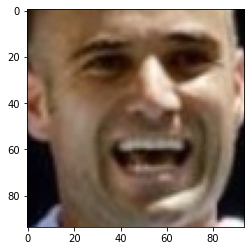

In [29]:
faces = detect.detect('test.jpg',method='mediapipe')
plt.imshow(faces[0])

In [6]:
DeepFace.detectFace('test.jpg').shape

(224, 224, 3)

In [3]:
app = FaceAnalysis(allowed_modules=['detection']) # enable detection model only
app.prepare(ctx_id=0, det_size=(640, 640))  
scrimg = cv2.imread('test.jpg')
ret_faces = []
faces = app.get(scrimg)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/mafffia/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/mafffia/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/mafffia/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/mafffia/.insightface/models/buffalo_l/genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/mafffia/.insightface/models/buffalo_l/w600k_r50.onnx recognition
set det-size: (640, 640)


In [51]:
img = cv2.imread('test.jpg')
min_detection_confidence=0.5
mp_face_detection = mediapipe.solutions.face_detection
face_detector =  mp_face_detection.FaceDetection(min_detection_confidence)
results = face_detector.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# print(results.detections)
for face in results.detections:
    kps = []
    for kp in face.location_data.relative_keypoints:
        kps.append([int(kp.x*img.shape[1]),int(kp.y*img.shape[0])])
    print(kps)
    # print (face.location_data.relative_keypoints[5])

[[106, 120], [146, 117], [130, 140], [130, 161], [81, 133], [163, 127]]


In [4]:
faces

[{'bbox': array([ 85.47469,  76.81839, 165.40952, 190.46407], dtype=float32),
  'kps': array([[109.66368 , 118.162125],
         [146.80638 , 116.46279 ],
         [132.13588 , 137.413   ],
         [113.007034, 157.01833 ],
         [147.43106 , 155.405   ]], dtype=float32),
  'det_score': 0.8473418}]

In [3]:
from retinaface import RetinaFace

In [11]:
faces = RetinaFace.detect_faces(img_path = 'test.jpg')

In [12]:
faces

{'face_1': {'score': 0.9989180564880371,
  'facial_area': [86, 76, 167, 192],
  'landmarks': {'right_eye': [109.999374, 118.28145],
   'left_eye': [146.62201, 117.99363],
   'nose': [129.83868, 135.41493],
   'mouth_right': [111.90126, 157.98032],
   'mouth_left': [146.38423, 157.41806]}}}

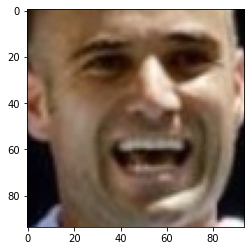

In [5]:
plt.imshow(faces[0])

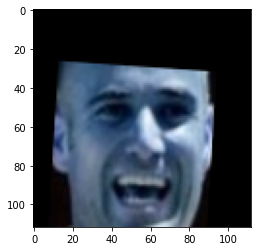

In [6]:
plt.imshow(affine.get_face_align(faces[0]))

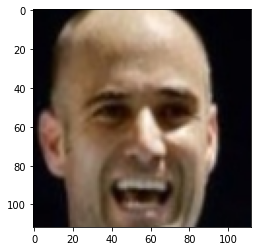

In [8]:
plt.imshow(affine.get_face_align('test.jpg'))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/mafffia/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/mafffia/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/mafffia/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/mafffia/.insightface/models/buffalo_l/genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/mafffia/.insightface/models/buffalo_l/w600k_r50.onnx recognition
set det-size: (640, 640)


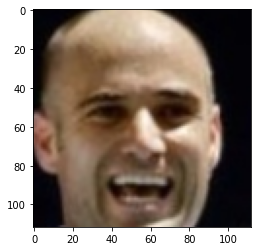

In [3]:
plt.imshow(sim.get_face_align('test.jpg'))


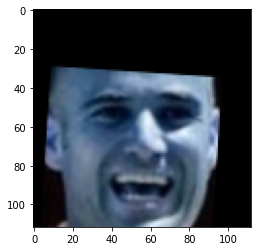

In [7]:
plt.imshow(sim.get_face_align(faces[0]))

In [6]:
from src.util.landmarks import retina_landmarks

In [8]:
retina_landmarks('test.jpg')[0]

[[146.62201, 117.99363],
 [109.999374, 118.28145],
 [129.83868, 135.41493],
 [146.38423, 157.41806],
 [111.90126, 157.98032]]

In [14]:
import mtcnn
import cv2
def detect_landmark(image, detector):
    '''
    image as numpy format with RGB format
    note that cv2 read is BGR format
    '''
    face = detector.detect_faces(image)[0]

    #draw points
    left_eye = face["keypoints"]["left_eye"]
    right_eye = face["keypoints"]["right_eye"]
    nose = face["keypoints"]["nose"]
    mouth_left = face["keypoints"]["mouth_left"]
    mouth_right = face["keypoints"]["mouth_right"]
    landmark = [[left_eye[0], left_eye[1]],
                   [right_eye[0], right_eye[1]],
                   [nose[0], nose[1]],
                   [mouth_left[0], mouth_left[1]],
                   [mouth_right[0], mouth_right[1]]]
    return landmark

In [15]:
detector = mtcnn.MTCNN()
img_file = cv2.imread('test.jpg')
img = cv2.cvtColor(img_file, cv2.COLOR_BGR2RGB)  # To RGB
landmark = detect_landmark(img, detector)

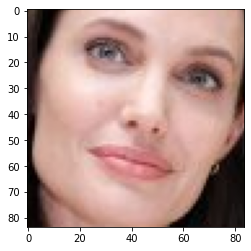

In [49]:
def det_mediapipe(img,min_detection_confidence=0.5):
    img = cv2.imread(img)
    mp_face_detection = mediapipe.solutions.face_detection
    face_detector =  mp_face_detection.FaceDetection(min_detection_confidence)
    results = face_detector.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # print(results.detections)
    ret_faces = []
    if results.detections:
        for face in results.detections:
            confidence = face.score
            bounding_box = face.location_data.relative_bounding_box
            y = int(bounding_box.xmin * img.shape[1])
            h = int(bounding_box.width * img.shape[1])
            x = int(bounding_box.ymin * img.shape[0])
            w = int(bounding_box.height * img.shape[0])
            cropped_face = img[x:x+w,y:y+h]
            cropped_face = cropped_face[:,:,::-1]
            ret_faces.append(cropped_face)
    return ret_faces

# faces = det_mediapipe('..//selfie.jpg')
# print(len(faces))
# img = cv2.imread('selfie.jpg')
# print(img)
# cv2.imshow('img',faces[0])
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(det_mediapipe('angelina.jpg')[0])